<a href="https://colab.research.google.com/github/skdding3/CSAI_assignment/blob/main/n212a_sunki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.isnull().sum() #missing value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1) 

In [ ]:
cond = (df['date'] >= "2015-01-01")
test = df[cond]
train = df.drop(test.index)
len(train), len(test)   #훈련데이터는 14633

(14633, 6980)

### 2) 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
features = ['bathrooms','sqft_living']
target = ['price']
X_train = train[features] # x train , test
X_test = test[features]

y_train = train[target] #y train , test
y_test = test[target]

model.fit(X_train,y_train) #fit method

y_pred_train = model.predict(X_train)   #test mae
y_pred_test = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred_test) #실제값과 예측값 차이

print(mae)

179252.52593261775


### 3) 

In [ ]:
model.coef_

array([[-5158.92591411,   286.13753555]])

In [ ]:
coef = model.coef_
coef_sqft_living = coef[0][1]

intercept = model.intercept_

print(coef_sqft_living , intercept)  #coef , intercept

286.1375355497683 [-50243.5627964]


### 4) 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

    mae = mean_absolute_error(y_test, y_pred_test)  #실제 값과 예측 값의 차이를 절댓값으로 변환해 평균
    mse = mean_squared_error(y_test, y_pred_test)   #실제 값과 예측 값의 차이를 제곱해 평균한 것
    rmse = math.sqrt(mse)                           #MSE값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성때매 루트를 씌우는 특징
    r2 = r2_score(y_test, y_pred_test)              #R² = 예측값 Variance / 실제값 Variance 분산기반으로 예측 성능 평가 1에 가까울수록 예측 정확도 높음.

print("MAE = {0}\nMSE = {1}\nRMSE = {2}\nR2 = {3}".format(mae, mse, rmse, r2))

MAE = 179252.52593261775
MSE = 71083994178.75656
RMSE = 266615.81757044455
R2 = 0.45999300199894533


## 🔥

### 5) 

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
image = Image.open("/maps.JPG")
#Just a screenshot from Google maps
image = np.array(image)

In [ ]:
low = df["price"] < 500000
high = df["price"] > 500000
long = df["long"][high].mean()
lat = df["lat"][high].mean()

In [ ]:
ids = df["id"]
df.drop(columns=["id"],inplace=True)

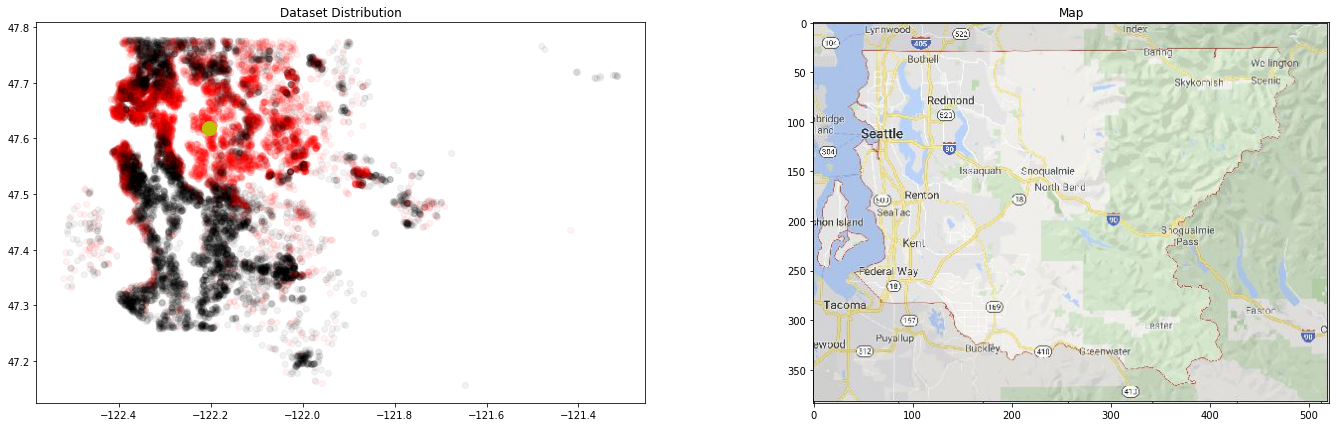

In [ ]:
f,axs = plt.subplots(1,2,figsize=(24,7))
tomato = "#FF6347"
axs[0].scatter(df["long"],df["lat"],alpha=0.05,c=low,cmap="flag")
axs[0].set_title("Dataset Distribution")
axs[0].scatter([[long]],[lat],c="y",s=200)
axs[1].imshow(image)
axs[1].set_title("Map")
plt.show()

대부분의 고가치 주택에 대해서 레드몬드 지역(노란색 지점 중심)을 중심으로 합니다....
친구들아 미안해!